In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font",size=14)
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\UdemePc\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\UdemePc\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
raw_data = pd.read_csv('TRAIN.csv').dropna(axis=0, how='all')
print(raw_data.shape)
print(list(raw_data.columns))

(1400, 16)
['Customer ID', 'network_age', 'Customer tenure in month', 'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend', 'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls', 'Total Onnet spend ', 'Total Offnet spend', 'Total Call centre complaint calls', 'Network type subscription in Month 1', 'Network type subscription in Month 2', 'Most Loved Competitor network in in Month 1', 'Most Loved Competitor network in in Month 2', 'Churn Status']


In [3]:
raw_data.head(20)

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.495100e+00,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.024400e+00,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.089800e+00,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.344700e+00,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
4,ADF0060,2175.0,72.50,554.1300,6.99,153.75,6.732040e+05,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0
5,ADF0066,158.0,5.27,792.1144,28.63,108.75,1.077136e+05,101.0,7296.0,16636.0,1.0,2G,2G,Uxaa,Mango,0.0
6,ADF0068,110.0,3.67,1090.5000,1.75,0.00,1.491020e+01,303.0,22176.0,71699.0,2.0,2G,2G,Zintel,Mango,0.0
7,ADF0072,558.0,18.60,29.5464,7.17,0.00,1.915330e+01,4.0,12.0,444.0,1.0,2G,2G,Uxaa,Mango,1.0
8,ADF0079,115.0,3.83,62.2520,6.76,11.25,2.013527e+05,13.0,0.0,3563.0,1.0,2G,3G,Mango,Mango,1.0
9,ADF0085,1868.0,62.27,120.1204,23.49,31.25,4.401846e+02,23.0,0.0,4254.0,1.0,2G,2G,Mango,Mango,1.0


In [4]:
raw_data['Churn Status'].dtype

dtype('float64')

In [5]:
raw_data['Most Loved Competitor network in in Month 1'].unique()

array(['Uxaa', 'Weematel', '0', 'Zintel', 'Mango', 'ToCall', 'PQza', nan], dtype=object)

In [6]:
raw_data['Most Loved Competitor network in in Month 2'].unique()

array(['Mango', 'PQza', 'ToCall', 'Uxaa', 'Weematel', 'Zintel', nan], dtype=object)

In [7]:
raw_data['Network type subscription in Month 1'].unique()

array(['2G', '3G', 'Other', nan], dtype=object)

In [8]:
raw_data['Network type subscription in Month 2'].unique()

array(['2G', '3G', nan, 'Other'], dtype=object)

In [9]:
raw_data[raw_data['Most Loved Competitor network in in Month 1']=='0']

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.344700e+00,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
148,ADF1211,3340.0,111.33,566.6600,0.00,0.00,2.871655e+05,210.0,502.0,920.0,1.0,2G,3G,0,Uxaa,0.0
159,ADF1269,3667.0,122.23,716.1000,24.12,1.25,2.969000e-01,89.0,34344.0,8592.0,4.0,2G,2G,0,Uxaa,0.0
209,ADF1514,3621.0,120.70,1235.2900,45.35,0.00,8.571758e+02,561.0,900.0,6193.0,2.0,2G,2G,0,Uxaa,0.0
278,ADF1825,431.0,14.37,2127.9144,79.49,62.50,1.308236e+06,779.0,7866.0,79394.0,2.0,2G,3G,0,Uxaa,1.0
283,ADF1889,5181.0,172.70,1034.2900,1.75,1.25,1.354789e+03,15.0,741.0,5414.0,2.0,2G,2G,0,Weematel,0.0
347,ADF0134,2245.0,74.83,2761.8000,26.70,213.75,1.276708e+06,76.0,9179.0,33008.0,1.0,3G,3G,0,Mango,1.0
348,ADF0136,508.0,16.93,3690.8300,40.06,462.50,2.626969e+06,857.0,0.0,171947.0,1.0,3G,3G,0,Mango,1.0
354,ADF0265,1649.0,54.97,129.6908,0.01,27.50,4.847966e+05,18.0,526.0,537.0,1.0,3G,3G,0,PQza,0.0
370,ADF0301,250.0,8.33,385.7884,0.00,136.25,5.438445e+05,8.0,0.0,1432.0,1.0,3G,3G,0,PQza,0.0


In [10]:
raw_data['Churn Status'].value_counts()

1.0    700
0.0    700
Name: Churn Status, dtype: int64

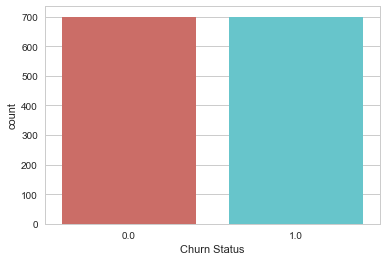

In [11]:
sns.countplot(x=raw_data['Churn Status'], data=raw_data, palette='hls')
plt.show()

In [12]:
raw_data.groupby('Churn Status').mean()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls
Churn Status,,,,,,,,,,
0.0,1609.101429,53.636643,842.694565,24.359757,47.935614,3.137873e+06,242.897143,6894.364286,11857.997143,2.090000
1.0,1292.167143,43.072314,768.588893,36.428814,69.028971,1.186741e+06,161.947143,6734.420000,19602.842857,1.754286


In [13]:
raw_data.groupby('Most Loved Competitor network in in Month 1').mean()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status
Most Loved Competitor network in in Month 1,,,,,,,,,,,
0,1547.657895,51.587632,1301.353842,29.849211,75.204474,2.490863e+06,239.657895,13002.500000,21110.342105,2.131579,0.315789
Mango,1462.549020,48.751667,787.779598,31.367402,57.680637,2.576416e+06,214.171569,6281.058824,18644.950980,1.936275,0.544118
PQza,1365.397059,45.513382,571.177320,28.085853,51.574765,2.392129e+06,137.879412,4304.879412,9661.511765,1.688235,0.605882
ToCall,1523.628713,50.787376,1023.720093,35.845050,91.549554,1.488690e+06,248.341584,9771.915842,21129.717822,1.742574,0.465347
Uxaa,1398.555556,46.618519,691.671914,29.970401,37.775401,2.032965e+06,173.570988,6274.620370,11939.006173,2.027778,0.472222
Weematel,1706.251799,56.875324,971.926987,31.966187,71.314748,1.631347e+06,282.366906,6952.474820,19786.438849,2.417266,0.446043
Zintel,1375.657895,45.855263,1033.333800,26.810395,58.849868,2.676910e+06,250.394737,8735.269737,21345.697368,1.940789,0.407895


In [14]:
raw_data.groupby('Most Loved Competitor network in in Month 2').mean()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status
Most Loved Competitor network in in Month 2,,,,,,,,,,,
Mango,1171.683168,39.055941,775.129248,29.723861,54.286634,1.839700e+06,125.811881,5630.009901,29677.227723,1.643564,0.673267
PQza,1158.688312,38.623117,299.462309,25.910909,33.385812,2.289527e+06,39.775974,1484.691558,4488.103896,1.775974,0.704545
ToCall,1156.843750,38.561563,680.810031,30.845312,34.712344,2.091256e+06,110.000000,5446.156250,25094.843750,1.328125,0.687500
Uxaa,1638.358263,54.611906,941.177077,30.180748,58.567322,2.076732e+06,280.834741,8976.082027,14767.534379,2.092883,0.369119
Weematel,1553.235294,51.774314,1941.366502,63.556275,256.431961,2.244743e+06,257.666667,10126.784314,53796.941176,1.764706,0.705882
Zintel,911.130435,30.371087,740.798800,29.000435,46.358696,3.601996e+06,118.195652,4522.630435,22831.369565,1.456522,0.630435


In [15]:
raw_data.groupby('Network type subscription in Month 1').mean()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status
Network type subscription in Month 1,,,,,,,,,,,
2G,1526.384868,50.879737,582.722688,26.621250,30.696842,4.692764e+05,181.496711,5787.513158,12024.375000,1.717105,0.509868
3G,1578.341195,52.611384,1085.052237,34.576509,97.470723,3.673649e+06,246.383648,6749.457547,20496.380503,2.226415,0.474843
Other,1305.350877,43.511649,556.350349,25.331895,19.591895,6.120667e+05,169.270175,8303.828070,11037.642105,1.512281,0.582456


In [16]:
raw_data.groupby('Network type subscription in Month 2').mean()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status
Network type subscription in Month 2,,,,,,,,,,,
2G,1495.475352,49.849507,597.808172,28.574401,26.920035,3.836908e+05,189.176056,5981.330986,12099.859155,1.658451,0.514085
3G,1525.494905,50.849767,1015.747570,34.550393,89.850000,3.469233e+06,229.679767,6418.363901,18985.989811,2.189229,0.465793
Other,1305.350877,43.511649,556.350349,25.331895,19.591895,6.120667e+05,169.270175,8303.828070,11037.642105,1.512281,0.582456


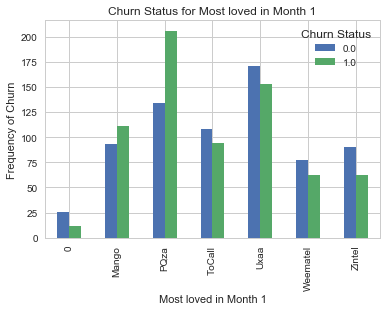

In [17]:
pd.crosstab(raw_data['Most Loved Competitor network in in Month 1'], raw_data['Churn Status']).plot(kind='bar')
plt.title('Churn Status for Most loved in Month 1')
plt.xlabel('Most loved in Month 1')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_fre_mostlovedmonth1')

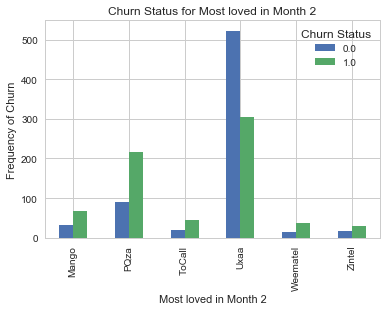

In [18]:
pd.crosstab(raw_data['Most Loved Competitor network in in Month 2'], raw_data['Churn Status']).plot(kind='bar')
plt.title('Churn Status for Most loved in Month 2')
plt.xlabel('Most loved in Month 2')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_fre_mostlovedmonth2')

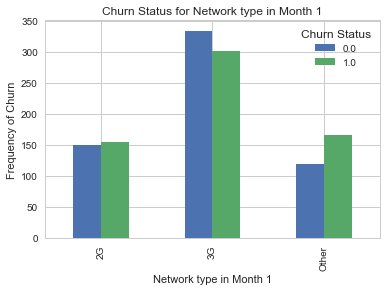

In [19]:
pd.crosstab(raw_data['Network type subscription in Month 1'], raw_data['Churn Status']).plot(kind='bar')
plt.title('Churn Status for Network type in Month 1')
plt.xlabel('Network type in Month 1')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_fre_networktypemonth1')

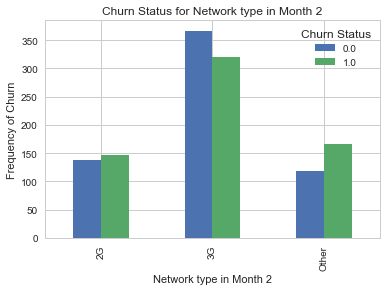

In [20]:
pd.crosstab(raw_data['Network type subscription in Month 2'], raw_data['Churn Status']).plot(kind='bar')
plt.title('Churn Status for Network type in Month 2')
plt.xlabel('Network type in Month 2')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_fre_networktypemonth2')

In [21]:
raw_data = raw_data.drop(['Network type subscription in Month 2'], axis=1)

In [22]:
raw_data[raw_data['Most Loved Competitor network in in Month 1']=='0']

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.344700e+00,69.0,6822.0,6274.0,1.0,2G,0,Mango,0.0
148,ADF1211,3340.0,111.33,566.6600,0.00,0.00,2.871655e+05,210.0,502.0,920.0,1.0,2G,0,Uxaa,0.0
159,ADF1269,3667.0,122.23,716.1000,24.12,1.25,2.969000e-01,89.0,34344.0,8592.0,4.0,2G,0,Uxaa,0.0
209,ADF1514,3621.0,120.70,1235.2900,45.35,0.00,8.571758e+02,561.0,900.0,6193.0,2.0,2G,0,Uxaa,0.0
278,ADF1825,431.0,14.37,2127.9144,79.49,62.50,1.308236e+06,779.0,7866.0,79394.0,2.0,2G,0,Uxaa,1.0
283,ADF1889,5181.0,172.70,1034.2900,1.75,1.25,1.354789e+03,15.0,741.0,5414.0,2.0,2G,0,Weematel,0.0
347,ADF0134,2245.0,74.83,2761.8000,26.70,213.75,1.276708e+06,76.0,9179.0,33008.0,1.0,3G,0,Mango,1.0
348,ADF0136,508.0,16.93,3690.8300,40.06,462.50,2.626969e+06,857.0,0.0,171947.0,1.0,3G,0,Mango,1.0
354,ADF0265,1649.0,54.97,129.6908,0.01,27.50,4.847966e+05,18.0,526.0,537.0,1.0,3G,0,PQza,0.0
370,ADF0301,250.0,8.33,385.7884,0.00,136.25,5.438445e+05,8.0,0.0,1432.0,1.0,3G,0,PQza,0.0


In [23]:
raw_data = pd.get_dummies(raw_data,columns=['Network type subscription in Month 1', 'Most Loved Competitor network in in Month 1','Most Loved Competitor network in in Month 2'])

In [24]:
raw_data.columns.values

array(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls', 'Churn Status',
       'Network type subscription in Month 1_2G',
       'Network type subscription in Month 1_3G',
       'Network type subscription in Month 1_Other',
       'Most Loved Competitor network in in Month 1_0',
       'Most Loved Competitor network in in Month 1_Mango',
       'Most Loved Competitor network in in Month 1_PQza',
       'Most Loved Competitor network in in Month 1_ToCall',
       'Most Loved Competitor network in in Month 1_Uxaa',
       'Most Loved Competitor network in in Month 1_Weematel',
       'Most Loved Competitor network in in Month 1_Zintel',
       'Most Loved Competitor network in in Month 2_Mango',
       'Most Loved Competitor network in in Month 

In [25]:
y = raw_data['Churn Status']
X = raw_data.drop(['Customer ID','Churn Status','Most Loved Competitor network in in Month 1_0'],axis=1)

In [26]:
X.columns

Index(['network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1_2G',
       'Network type subscription in Month 1_3G',
       'Network type subscription in Month 1_Other',
       'Most Loved Competitor network in in Month 1_Mango',
       'Most Loved Competitor network in in Month 1_PQza',
       'Most Loved Competitor network in in Month 1_ToCall',
       'Most Loved Competitor network in in Month 1_Uxaa',
       'Most Loved Competitor network in in Month 1_Weematel',
       'Most Loved Competitor network in in Month 1_Zintel',
       'Most Loved Competitor network in in Month 2_Mango',
       'Most Loved Competitor network in in Month 2_PQza',
       'Most Loved Competitor network in in Month 2_ToCall',
       'Most Love

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True False False  True False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[3 7 4 1 2 8 1 6 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [28]:
X_data = X.drop(['network_age','Customer tenure in month','Total Spend in Months 1 and 2 of 2017','Total Data Spend','Total Data Consumption', 'Total Onnet spend ','Total Offnet spend'],axis=1)

In [29]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X_data)
result=logit_model.fit()
print(result.summary())

C:\Users\UdemePc\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.624544
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           Churn Status   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1382
Method:                           MLE   Df Model:                           17
Date:                Tue, 20 Feb 2018   Pseudo R-squ.:                 0.09897
Time:                        09:08:20   Log-Likelihood:                -874.36
converged:                       True   LL-Null:                       -970.41
                                        LLR p-value:                 1.108e-31
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Total SMS Spend         

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3, random_state=0)
import xgboost as xgb
from sklearn import metrics
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
xg_cl.fit(X_train,y_train)
pred = xg_cl.predict(X_test)
score = xg_cl.score(X_test,y_test)

ImportError: No module named 'xgboost'

In [72]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


In [73]:
test_data = pd.read_csv('TEST.csv').dropna(axis=0, how='all')
print(test_data.shape)
print(list(test_data.columns))

(600, 15)
['Customer ID', 'network_age', 'Customer tenure in month', 'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend', 'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls', 'Total Onnet spend ', 'Total Offnet spend', 'Total Call centre complaint calls', 'Network type subscription in Month 1', 'Network type subscription in Month 2', 'Most Loved Competitor network in in Month 1', 'Most Loved Competitor network in in Month 2']


In [74]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 15 columns):
Customer ID                                    600 non-null object
network_age                                    600 non-null int64
Customer tenure in month                       600 non-null float64
Total Spend in Months 1 and 2 of 2017          600 non-null float64
Total SMS Spend                                600 non-null float64
Total Data Spend                               600 non-null float64
Total Data Consumption                         600 non-null float64
Total Unique Calls                             600 non-null int64
Total Onnet spend                              600 non-null int64
Total Offnet spend                             600 non-null int64
Total Call centre complaint calls              600 non-null int64
Network type subscription in Month 1           530 non-null object
Network type subscription in Month 2           538 non-null object
Most Loved Competitor ne

In [75]:
test_data.head(20)

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2
0,ADF0001,1012,33.733333,1560.1156,14.04,226.30,3.126093e+06,64,14503,12402,1,3G,3G,Weematel,Mango
1,ADF0002,137,4.566667,1705.8368,73.63,5.00,1.628809e+02,515,29832,88953,9,3G,3G,ToCall,Mango
2,ADF0003,202,6.733333,1720.3008,4.36,245.00,3.334607e+06,163,228,1495,1,3G,3G,ToCall,Mango
3,ADF0004,165,5.500000,1732.2800,0.00,12.50,6.682924e+05,484,0,71928,2,3G,3G,Uxaa,Mango
4,ADF0005,759,25.300000,1873.0600,69.57,412.50,6.666975e+06,64,7616,20753,2,3G,3G,Mango,Mango
5,ADF0006,129,4.300000,1877.2600,46.11,343.75,3.387698e+06,121,0,20944,1,3G,3G,PQza,Mango
6,ADF0007,148,4.933333,2388.8208,17.99,1.25,1.291677e+05,830,0,93461,1,NaN,3G,0,Mango
7,ADF0008,1144,38.133333,2702.3500,47.84,48.75,3.390062e+03,431,60102,131525,1,3G,3G,Mango,Mango
8,ADF0009,137,4.566667,2782.5572,179.52,315.00,3.632011e+06,622,0,40724,2,3G,3G,Weematel,Mango
9,ADF0010,1456,48.533333,2934.7028,200.37,108.75,4.063889e+04,892,16572,150693,1,Other,Other,PQza,Mango


In [76]:
test_data = test_data.drop(['Network type subscription in Month 2'], axis=1)

In [77]:
test_data = pd.get_dummies(test_data,columns=['Network type subscription in Month 1', 'Most Loved Competitor network in in Month 1','Most Loved Competitor network in in Month 2'])

In [78]:
test_data.columns

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1_2G',
       'Network type subscription in Month 1_3G',
       'Network type subscription in Month 1_Other',
       'Most Loved Competitor network in in Month 1_0',
       'Most Loved Competitor network in in Month 1_Mango',
       'Most Loved Competitor network in in Month 1_PQza',
       'Most Loved Competitor network in in Month 1_ToCall',
       'Most Loved Competitor network in in Month 1_Uxaa',
       'Most Loved Competitor network in in Month 1_Weematel',
       'Most Loved Competitor network in in Month 1_Zintel',
       'Most Loved Competitor network in in Month 2_Mango',
       'Most Loved Competitor network in in Month 2_PQza',
       

In [79]:
X_result = test_data.drop(['Customer ID', 'network_age','Customer tenure in month','Total Spend in Months 1 and 2 of 2017','Total Data Spend','Total Data Consumption', 'Most Loved Competitor network in in Month 1_0', 'Total Onnet spend ','Total Offnet spend'],axis=1)

In [80]:
predictions = logreg.predict(X_result)

In [81]:
cust_id = test_data['Customer ID']
df = pd.DataFrame(cust_id, columns=['Customer ID'])
df['Churn Status'] = predictions.astype(np.int64)

In [82]:
df['Churn Status'].value_counts()

0    368
1    232
Name: Churn Status, dtype: int64

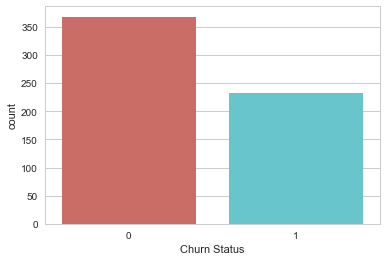

In [83]:
sns.countplot(x=df['Churn Status'], data=df, palette='hls')
plt.show()

In [84]:
df['Churn Status'].dtype

dtype('int64')

In [85]:
df['Churn Status'].dtype

dtype('int64')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 2 columns):
Customer ID     600 non-null object
Churn Status    600 non-null int64
dtypes: int64(1), object(1)
memory usage: 34.1+ KB


In [87]:
df.to_csv('predictions.csv', index=False)

In [52]:
sample = pd.read_csv('sample.csv')

In [60]:
sample['Churn Status'].dtype

dtype('int64')